# 6.2 Exploring Relationships

This script contains the following:
1.Importing visualization Libraries and Data
2.Data Cleaning
3.Exploring Relationships
    Correlations
    Scatterplots
    Pair Plots
    Categorical Plots

# 1.Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.5.2'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
#Define path
path = r'C:\Users\JocGa\Achievement 6'

In [6]:
# Import data
df_merged_report = pd.read_csv(os.path.join(path, '02 Data', 'Merged_Happiness_Report_2015_2019.csv'))

# Data Cleaning

In [7]:
df_merged_report.shape

(781, 11)

In [8]:
df_merged_report.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity'],
      dtype='object')

In [9]:
#drop unname columns for df
df_merged_report = df_merged_report.drop(columns = ['Unnamed: 0'])

In [10]:
df_merged_report.dtypes

Country             object
Year                 int64
Happiness_Rank       int64
Happiness_Score    float64
GDP_per_Capita     float64
Social_Support     float64
Life_Expectancy    float64
Freedom            float64
Corruption         float64
Generosity         float64
dtype: object

In [11]:
df_merged_report.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
0,Afghanistan,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,Albania,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,Algeria,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,Angola,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,Argentina,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451


# Missing Values Check:

In [12]:
#check for missing values
df_merged_report.isnull().sum()

Country            0
Year               0
Happiness_Rank     0
Happiness_Score    0
GDP_per_Capita     0
Social_Support     0
Life_Expectancy    0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

#observation no missing values!

# Duplicates Check:

In [13]:
# Find duplicates
df_merged_report_dups = df_merged_report[df_merged_report.duplicated()]

In [14]:
df_merged_report_dups.shape

(0, 10)

#observation no duplicates!

# Mixed-Type Data:

In [15]:
for col in df_merged_report.columns.tolist():
    weird = (df_merged_report[[col]].applymap(type) != df_merged_report[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_merged_report[weird]) > 0:
        print (col)

#observation no mixed-type columns either!

# 3. Exploring Relationships

# Correlations

In [16]:
# Create a correlation matrix using pandas
df_merged_report.corr()

,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
Year,1.000000,-0.006594,0.005946,0.017230,0.368585,0.130138,0.011118,-0.122264,-0.192416
Happiness_Rank,-0.006594,1.000000,-0.992053,-0.795110,-0.647420,-0.744099,-0.540151,-0.372781,-0.118290
Happiness_Score,0.005946,-0.992053,1.000000,0.789719,0.651246,0.742843,0.553365,0.398418,0.138142
GDP_per_Capita,0.017230,-0.795110,0.789719,1.000000,0.592889,0.787752,0.345615,0.306307,-0.013646
Social_Support,0.368585,-0.647420,0.651246,0.592889,1.000000,0.573252,0.419795,0.126401,-0.037597
Life_Expectancy,0.130138,-0.744099,0.742843,0.787752,0.573252,1.000000,0.341155,0.250512,0.010718
Freedom,0.011118,-0.540151,0.553365,0.345615,0.419795,0.341155,1.000000,0.459593,0.290564
Corruption,-0.122264,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920
Generosity,-0.192416,-0.118290,0.138142,-0.013646,-0.037597,0.010718,0.290564,0.318920,1.000000


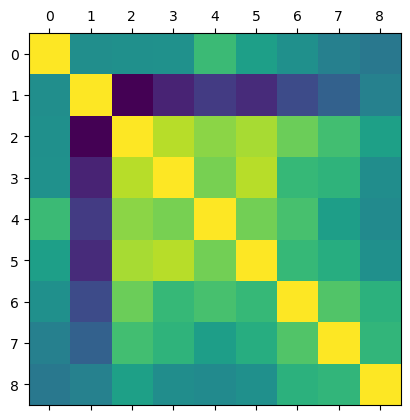

In [17]:
# create a correlation heatmap using matplotlib
plt.matshow(df_merged_report.corr())
plt.show()

# Create a correlation heatmap using seaborn:

In [18]:
df_merged_report.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity'],
      dtype='object')

In [19]:
#create a subset excluding the 'country' and 'year'
sub = df_merged_report[['Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity']]

In [20]:
sub

,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
...,...,...,...,...,...,...,...,...
776,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
777,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
778,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
779,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


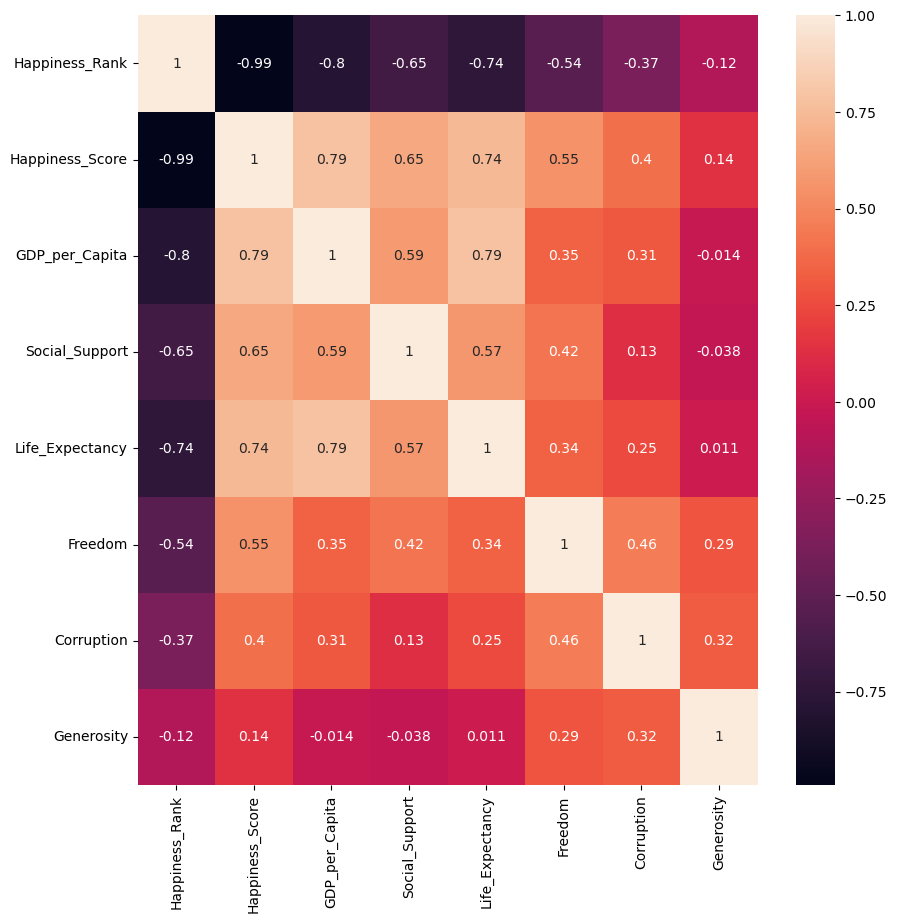

In [21]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#observation a strong positive correlation exists bwt the Happiness Score and indicators such as GDP per capita, social support, and life expectancy. This indicates that as these factors increase, the Happiness Score tends to rise as well.there is a moderate relationship between happiness score and corruption, implying that lower levels of corruption are associated with higher levels of happiness. On the other hand, the relationship between the Happiness Score and generosity is relatively weak, suggesting that generosity alone does not strongly influence happiness. In addition, there is a positive correlation between GDP per capita and life expectancy, life expectancy and social support. 

# Scatterplots:

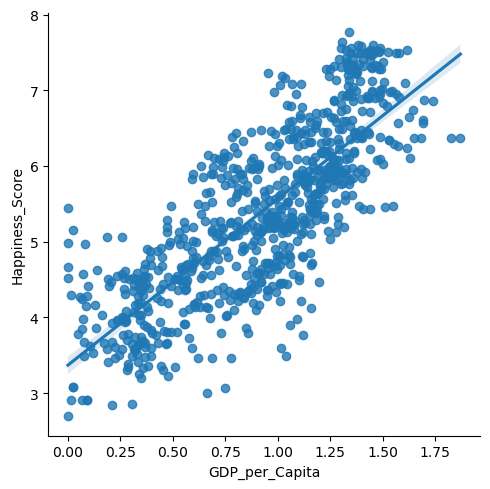

In [22]:
#create a scatterplot for the 'Happiness_score' and 'GDP_per_Capita'
Happiness_GDP = sns.lmplot(x = 'GDP_per_Capita', y = 'Happiness_Score', data = sub)

#observation, when the GDP_per_capita goes up the happiness score goes up making a positive relationship; As the GDP per capita increases, the happiness score also tends to rise. This suggests that higher levels of economic prosperity, as reflected by GDP per capita, contribute positively to people's happiness.

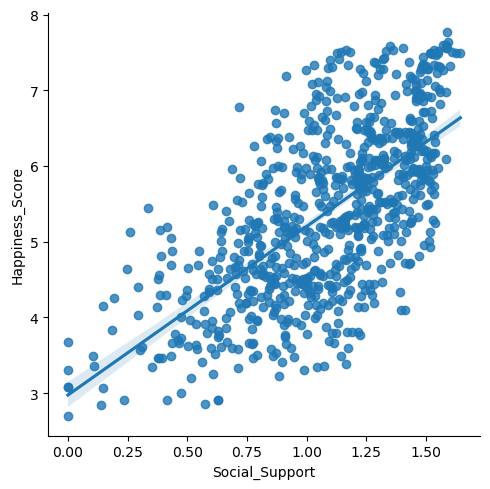

In [23]:
#create a scatterplot for the 'Happiness_score' and 'social_support'
sns.lmplot(x = 'Social_Support', y = 'Happiness_Score', data = sub)

#observation, As the level of social support increases, the happiness score also tends to increase. This implies that the extent to which individuals receive support from their families and social networks plays a significant role in determining their happiness. Furthermore, it is worth noting that once the measure of social support surpasses a threshold of 0.75, there is a noticeable increase in the happiness score. This suggests that when social support reaches a relatively high level, it has an even greater impact on enhancing happiness.

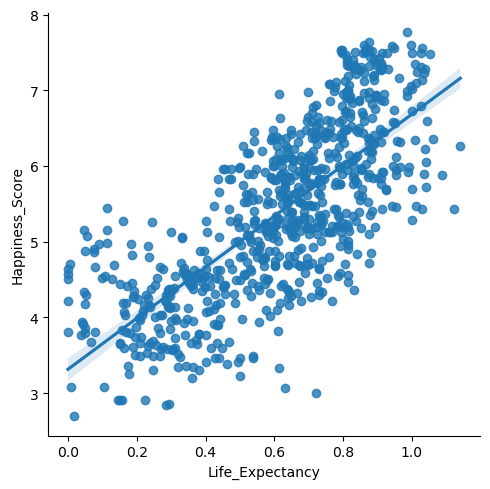

In [24]:
#create a scatterplot for the 'Happiness_score' and 'life_expectancy'
sns.lmplot(x = 'Life_Expectancy', y = 'Happiness_Score', data = sub)

#observation, When life expectancy, which serves as an indicator of overall health, is high, the happiness score also tends to be high. This suggests that individuals in countries with longer life expectancies generally experience higher levels of happiness. The findings underscore the significant role that good health and longevity play in contributing to overall happiness and well-being.

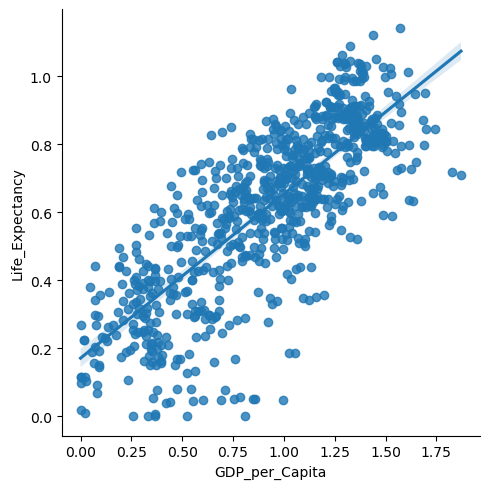

In [25]:
# Create a scatterplot for the 'GDP_per_Capita' and 'Life_Expectancy' 
sns.lmplot(x = 'GDP_per_Capita', y = 'Life_Expectancy', data = sub)

#observation As the GDP per capita increases, the life expectancy of individuals also tends to rise. This indicates that higher levels of economic prosperity, as reflected by GDP per capita, are associated with improved healthcare infrastructure, access to medical services, and overall better living conditions. As a result, people in countries with higher GDP per capita tend to have longer life expectancies. The findings highlight the significant influence of economic factors on the health and well-being of individuals.

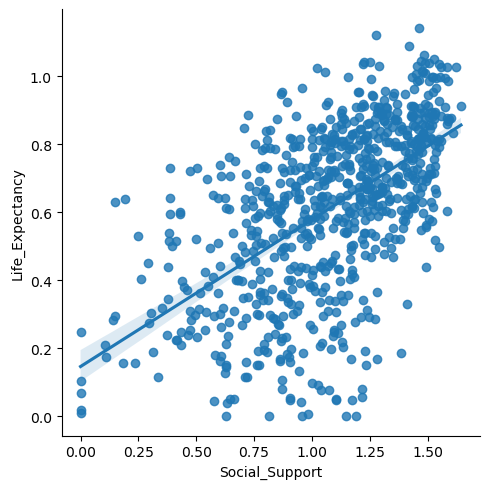

In [26]:
# Create a scatterplot for the 'GDP_per_Capita' and 'Life_Expectancy' 
sns.lmplot(x = 'Social_Support', y = 'Life_Expectancy', data = sub)

#observation when social support of families goes up the life expenctancy of a person goes up too, making a positive relationship. Yet there are outliers that shows even tho they have social support there life expectancy doesnt go up. These outliers indicate that there may be other factors influencing life expectancy beyond social support alone. It suggests that while social support is generally beneficial for promoting longer life expectancies, there may be additional factors such as access to healthcare, lifestyle choices, and environmental factors that can impact life expectancy as well.

# Pair Plots:

In [27]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy']]

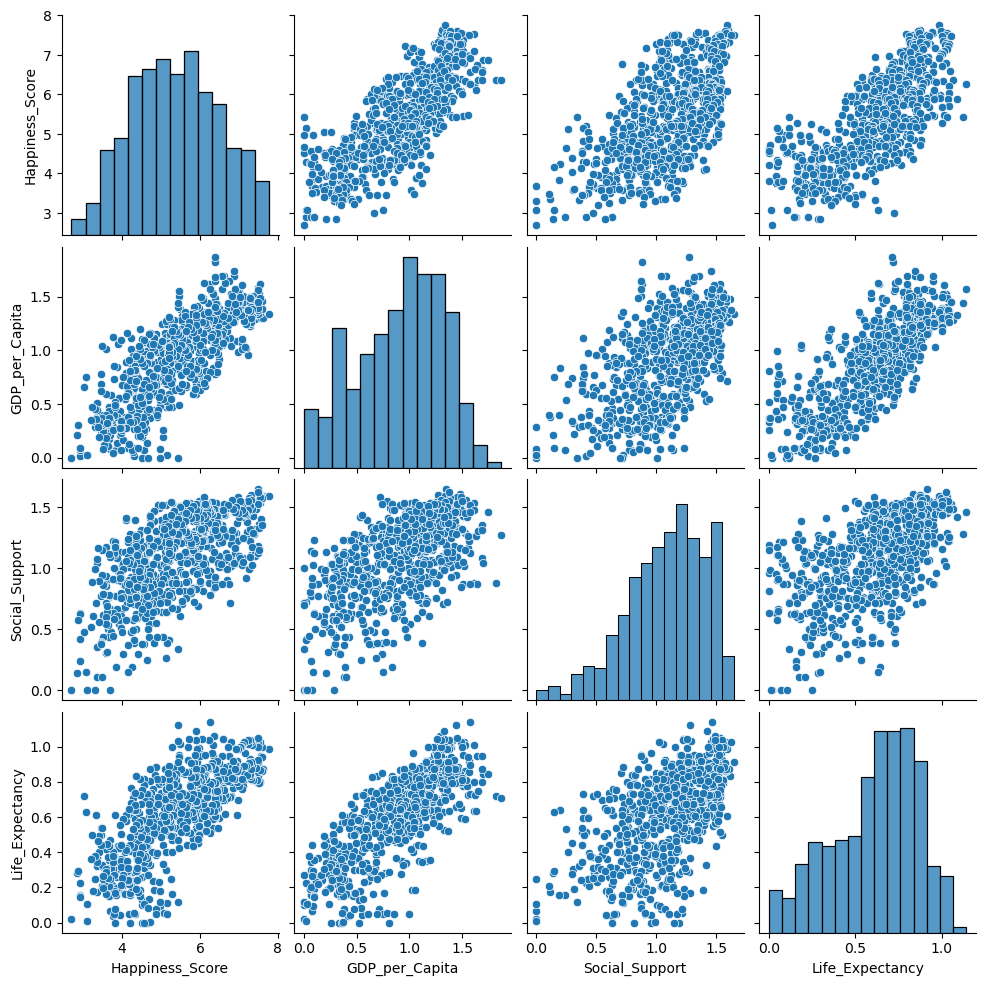

In [28]:
#create a pair plot
pairplt = sns.pairplot(sub_2)

# Categorical Plots

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

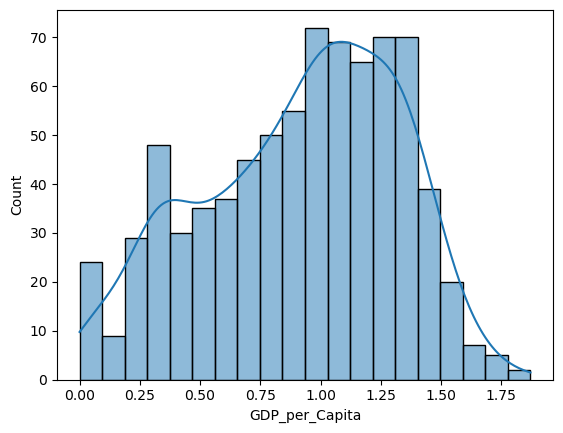

In [29]:
#use a histogram to visualize distribution GDP per Capita
sns.histplot(df_merged_report['GDP_per_Capita'], bins=20, kde=True)

In [30]:
#create a new column called GPD_level
df_merged_report.loc[df_merged_report['GDP_per_Capita'] < 0.5, 'GDP_level1'] = 'Low'

In [31]:
df_merged_report.loc[(df_merged_report['GDP_per_Capita'] >= 0.5) & (df_merged_report['GDP_per_Capita'] < 1.75), 'GDP_level1'] = 'Medium'

In [32]:
df_merged_report.loc[df_merged_report['GDP_per_Capita'] > 1.75, 'GDP_level1'] = 'High'

In [33]:
df_merged_report['GDP_level1'].value_counts(dropna = False)

Medium    626
Low       153
High        2
Name: GDP_level1, dtype: int64

In [34]:
df_merged_report.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity', 'GDP_level1'],
      dtype='object')

In [35]:
#create a new column called rank_level
df_merged_report['Happiness_Rank'].describe()

count    781.000000
mean      78.773367
std       45.162398
min        1.000000
25%       40.000000
50%       79.000000
75%      118.000000
max      158.000000
Name: Happiness_Rank, dtype: float64

In [36]:
df_merged_report.loc[df_merged_report['Happiness_Rank'] <= 40, 'rank_level'] = '0-40'
df_merged_report.loc[(df_merged_report['Happiness_Rank'] > 40) & (df_merged_report['Happiness_Rank'] <= 80), 'rank_level'] = '40-80'
df_merged_report.loc[(df_merged_report['Happiness_Rank'] > 80) & (df_merged_report['Happiness_Rank'] <= 120), 'rank_level'] = '80-120'
df_merged_report.loc[df_merged_report['Happiness_Rank'] > 120, 'rank_level'] = '>120'

In [37]:
df_merged_report['rank_level'].value_counts(dropna = False)

80-120    200
40-80     200
0-40      199
>120      182
Name: rank_level, dtype: int64

In [38]:
df_merged_report.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,GDP_level1,rank_level
0,Afghanistan,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,Low,>120
1,Albania,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,Medium,80-120
2,Algeria,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,Medium,40-80
3,Angola,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,Medium,>120
4,Argentina,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,Medium,0-40


# Categorical Plot 

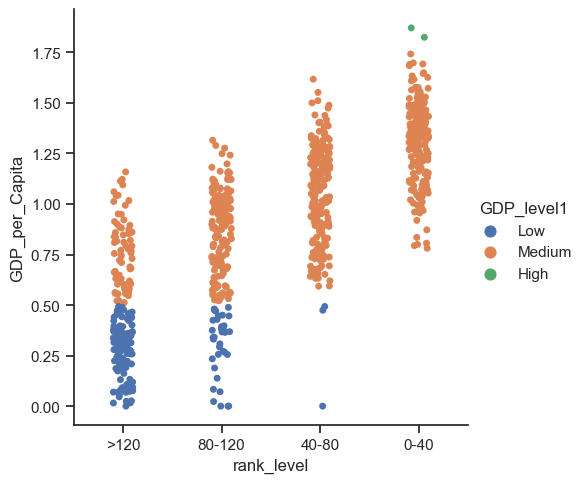

In [39]:
#create a categorical plot in seaborn using GDP_level1 and rank_level
sns.set(style="ticks")
GDP_levels = sns.catplot(x="rank_level", y="GDP_per_Capita", hue="GDP_level1", data=df_merged_report)

#observation, The rank level indicates a country's position in terms of the highest happiness score. A higher rank corresponds to a higher happiness score, indicating greater levels of happiness. The chart demonstrates a positive relationship between GDP per capita and happiness rank, meaning that countries with higher GDP per capita tend to have higher happiness ranks, and conversely, lower GDP per capita is associated with lower happiness ranks. This finding underscores the considerable impact of economic conditions on individual happiness, as observed in this study.

# Question and Answer 

#question: Is there a correlation between GDP per Capita and Happiness Score? How strong is the correlation? 
Answer: Yes,The chart demonstrates a positive relationship between GDP per capita and happiness rank, meaning that countries with higher GDP per capita tend to have higher happiness ranks, and conversely, lower GDP per capita is associated with lower happiness ranks. This finding underscores the considerable impact of economic conditions on individual happiness, as observed in this study.

question: Is there a correlation between social support and Happiness Score?
Answer: yes, This implies that the extent to which individuals receive support from their families and social networks plays a significant role in determining their happiness. This suggests that when social support reaches a relatively high level, it has an even greater impact on enhancing happiness.

question: is there a correlation between life expectancy and hapiness score? yes, this suggests that individuals in countries with longer life expectancies generally experience higher levels of happiness. The findings underscore the significant role that good health and longevity play in contributing to overall happiness and well-being.

question: What are the main factors influencing the happiness score over the years? 
answer: GDP per capita, social support, and life expectancy

Unanswered questions: Which country has the highest and lowest average Happiness Score across all years? Which year had the highest average Happiness Score globally? Are there any countries that consistently ranked in the top 10 in terms of Happiness Score throughout the years? How does the distribution of Happiness Scores vary across different continents or regions? Are there any significant changes in Happiness Rank for specific countries over time? What is the overall trend of Happiness Score across the years


#hypotheses 

Countries with higher levels of economic production, social support, life expectancy are more likely to have higher happiness scores and rankings.

Countries with a high GDP per capita level present a higer happiness score.

# Save figs 

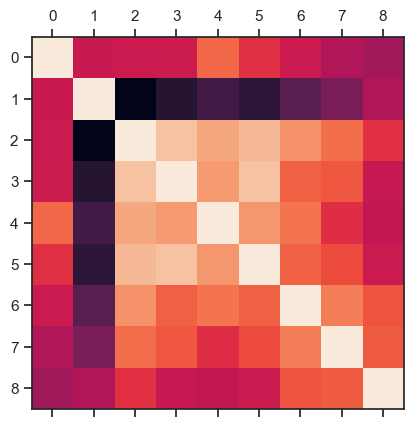

In [40]:
#save figure
plt.matshow(df_merged_report.corr())
plt.savefig("out.png")

In [41]:
#current dir
cwd = os.getcwd()

In [42]:
cwd

'C:\\Users\\JocGa\\Achievement 6\\03 Scripts'

In [43]:
# fig =GDP_levels.get_figure()
GDP_levels.savefig("out.png")

In [47]:
df_merged_report.to_csv(os.path.join(path,'02 Data', 'Happiness_rank.csv'))